In [1]:
##https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/sketch_recognition_cnn/sketch_recognition_cnn.ipynb#scrollTo=ZTO-30-IMfK3
##how to feed grayscale images to pretrained models which requires 3 input channels:
##https://stackoverflow.com/questions/51995977/how-can-i-use-a-pre-trained-neural-network-with-grayscale-images

from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import platform
import pathlib
import random
import pandas as pd
# mogrify

In [2]:
# !pip install -U opencv-python
# !pip install tensorflow==2.7.3
# !pip install -q tf-models-official==2.7.0
# !pip install tensorflow_hub
# !pip install tensorflow_text
# # # !pip install keras-lr-multiplier

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0:2], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

2 Physical GPUs, 2 Logical GPU


In [5]:
sketch = pd.read_csv('data/sketch_cleaned.csv',encoding = 'unicode_escape')

len(sketch)

1102

In [6]:
from os.path import exists
import statistics

image = {}
lst = []
intensity_list = []
median_list = []
for i in range(0,1127):
# for i in [11,10]:
    if exists('data/Frothers-reduced-gray/Page-'+str(i)+'.png') and 'Page-'+str(i) in list(sketch.Image_ID):
        lst = lst + ['Page-'+str(i)]
        img = cv2.imread('data/Frothers-reduced-gray/Page-'+str(i)+'.png')

        A = cv2.resize(img, (int(0.3*img.shape[1]),int(0.3*img.shape[0])), interpolation = cv2.INTER_AREA)
#         A = cv2.resize(img, (int(0.4*img.shape[1]),int(0.4*img.shape[0])), interpolation = cv2.INTER_AREA) ##(525,1030)
        B = np.ones((309,309,3))*255 
#         B = np.ones((476,476,3))*255 
        B[0:A.shape[0],0:A.shape[1],:] = A
        C = 255 - B
        image[i] = C
        
        lst_intensities = []
        g_intensities = []
        r_intensities = []
        b_intensities = []
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        a = np.mean(gray)
        pts = np.where(gray < a)
        lst_intensities.append(gray[pts[0], pts[1]])
        intensity = statistics.mean(lst_intensities[0].tolist())
        median = statistics.median(lst_intensities[0].tolist())
        
        intensity_list = intensity_list + [intensity]
        median_list = median_list + [median]

In [7]:
# A.shape

(157, 309, 3)

In [8]:
sketch = sketch[sketch['Image_ID'].isin(lst)]
sketch = sketch.reset_index(drop=True)
sketch['intensity'] = intensity_list
sketch['median'] = median_list
len(sketch)

1086

In [9]:
sketch['Image_ID'].tolist() == lst

True

In [10]:
A.shape

(157, 309, 3)

In [11]:
from sklearn.model_selection import train_test_split

sketch = pd.read_csv('data/sketch_drawing.csv')

var = 'Unique_expert'
# var = 'Drawing_expert'
# var = 'Useful_expert'
# var = 'Elegence_expert'
# var = 'Creativity_expert'

mapping1 = {'Creativity_expert': 'Creativity',
                       'Useful_expert': 'Useful',
                       'Unique_expert': 'Unique',
                       'Drawing_expert': 'Drawing',
                       'Elegence_expert': 'Elegence',}
mapping = {'Creativity_expert': 'Creativity_expert_round',
                       'Useful_expert': 'Useful_expert_round',
                       'Unique_expert': 'Unique_expert_round',
                       'Drawing_expert': 'Drawing_expert_round',
                       'Elegence_expert': 'Elegence_expert_round',}

images = [image[i] for i in image.keys()]

In [12]:
len(sketch)

1086

In [13]:
# from sklearn.model_selection import train_test_split

# train_df = sketch[sketch['set2_'+var] == 'train'] 
# # val_df = sketch1[sketch1['set2_'+var] == 'val'] 
# # test_df = sketch1[sketch1['set2_'+var] == 'test'] 

# images = [image[i] for i in image.keys()]

# train_graph, test_graph1, train_cost, test_cost1 = train_test_split(list(train_df.index), train_df[mapping1[var]], random_state=2018, 
#                                                                   train_size=0.75, stratify=train_df[mapping1[var]])
# train_graph, test_graph2, train_cost, test_cost2 = train_test_split(train_graph, train_cost, random_state=2018, 
#                                                               train_size=2/3, stratify=train_cost)
# train_graph, test_graph3, train_cost, test_cost3 = train_test_split(train_graph, train_cost, random_state=2018, 
#                                                               train_size=0.5, stratify=train_cost)
# # print(len(train_graph), len(val_graph), len(test_graph))

In [14]:
# for i in range(0,1086):
#     if i in test_cost1.index:
#         sketch.loc[i, 'partition_'+var] = 'train1'
#     elif i in test_cost2.index:
#         sketch.loc[i, 'partition_'+var] = 'train2'
#     elif i in test_cost3.index:
#         sketch.loc[i, 'partition_'+var] = 'train3'
#     elif i in train_cost.index:
#         sketch.loc[i, 'partition_'+var] = 'train4'
#     else:
#         sketch.loc[i, 'partition_'+var] = 'train5'
        
# sketch.to_csv('data/sketch_drawing.csv')

In [15]:
# sketch[['partition_'+var, 'set2_'+var]]

In [17]:
sketch1 = pd.read_csv('data/sketch_drawing.csv')

images = [image[i] for i in image.keys()]
train_df = sketch1[sketch1['set2_'+var] == 'train'] 
val_df = sketch1[sketch1['set2_'+var] == 'val'] 
test_df = sketch1[sketch1['set2_'+var] == 'test'] 

# var1 = 'train1'
# train_df = sketch1[sketch1['partition_'+var] != var1] 
# test_df = sketch1[sketch1['partition_'+var] == var1] 
# val_graph, test_graph, val_cost, test_cost = train_test_split(list(test_df.index), test_df[mapping1[var]], random_state=2018, 
#                                                                   train_size=0.5, stratify=test_df[mapping1[var]])

train_graph = [images[i] for i in train_df.index]
val_graph = [images[i] for i in val_df.index]
test_graph = [images[i] for i in test_df.index]
all_graph = [images[i] for i in range(len(images))]

sketch1 = sketch1.astype({"text": str})
text = list(sketch1['text'])
train_text = [text[i] for i in train_df.index]
val_text = [text[i] for i in val_df.index]
test_text = [text[i] for i in test_df.index]

In [18]:
train_cost = train_df[var]
val_cost = val_df[var]
test_cost = test_df[var]

image_shape = train_graph[0].shape

In [19]:
x_train = np.array(train_graph)/255
x_val = np.array(val_graph)/255
x_test = np.array(test_graph)/255
x_all = np.array(all_graph)/255

In [20]:
import os
import shutil
import logging
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal.windows import triang

def get_bin_idx(x):
    return min(int(x * np.float32(10)), 99)

def get_lds_kernel_window(kernel, ks, sigma):
    assert kernel in ['gaussian', 'triang', 'laplace']
    half_ks = (ks - 1) // 2
    if kernel == 'gaussian':
        base_kernel = [0.] * half_ks + [1.] + [0.] * half_ks
        kernel_window = gaussian_filter1d(base_kernel, sigma=sigma) / max(gaussian_filter1d(base_kernel, sigma=sigma))
    elif kernel == 'triang':
        kernel_window = triang(ks)
    else:
        laplace = lambda x: np.exp(-abs(x) / sigma) / (2. * sigma)
        kernel_window = list(map(laplace, np.arange(-half_ks, half_ks + 1))) / max(map(laplace, np.arange(-half_ks, half_ks + 1)))

    return kernel_window

In [21]:
#https://github.com/YyzHarry/imbalanced-regression

from collections import Counter
from scipy.ndimage import convolve1d

for i in [0]:
    # preds, labels: [Ns,], "Ns" is the number of total samples
#     preds, labels = train_df, train_cost1[var]
    labels = train_cost
    # assign each label to its corresponding bin (start from 0)
    # with your defined get_bin_idx(), return bin_index_per_label: [Ns,] 
    bin_index_per_label = [get_bin_idx(label) for label in labels]

    # calculate empirical (original) label distribution: [Nb,]
    # "Nb" is the number of bins
    Nb = max(bin_index_per_label) + 1
    num_samples_of_bins = dict(Counter(bin_index_per_label))
    emp_label_dist = [num_samples_of_bins.get(i, 0) for i in range(Nb)]

    # lds_kernel_window: [ks,], here for example, we use gaussian, ks=5, sigma=2
    lds_kernel_window = get_lds_kernel_window(kernel='gaussian', ks=5, sigma=2)
    # calculate effective label distribution: [Nb,]
    eff_label_dist = convolve1d(np.array(emp_label_dist), weights=lds_kernel_window, mode='constant')

    # Use re-weighting based on effective label distribution, sample-wise weights: [Ns,]
    eff_num_per_label = [eff_label_dist[bin_idx] for bin_idx in bin_index_per_label]
    weights = [np.float32(1 / x) for x in eff_num_per_label]
    # # calculate loss
    # loss = weighted_mse_loss(preds, labels, weights=weights)                  

In [22]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
          'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [23]:
import tensorflow_hub as hub
import tensorflow_text as text
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [24]:
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Model, Input, layers, regularizers
from keras.models import load_model
from tensorflow.keras import activations
from official.nlp import optimization 

epochs = 1000
steps_per_epoch = 37
num_train_steps = steps_per_epoch * epochs

a = 0.00
# if var == 'Unique_expert':
#     a = 0.005
# elif var == 'Creativity_expert':
#     a = 0.02
# elif var == 'Useful_expert':
#     a = 0.1
num_warmup_steps = int(a*num_train_steps)
init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

merge = []
input_tensor = Input(shape=1048, name='input')

model_name1 = 'model weight/'+var+'/new text-'+var+'-best.h5'
base_model1 = load_model(model_name1, custom_objects={'KerasLayer':hub.KerasLayer,'AdamWeightDecay': optimizer})
for layer in base_model1.layers:
    layer._name = layer._name + "_a"

sequence_output_1 = base_model1.layers[2].output['encoder_outputs'][0][:,0,:]
sequence_output_1 = layers.BatchNormalization()(sequence_output_1)
sequence_output_1 = layers.Activation('tanh')(sequence_output_1)
sequence_output_2 = base_model1.layers[2].output['encoder_outputs'][1][:,0,:]
sequence_output_2 = layers.BatchNormalization()(sequence_output_2)
sequence_output_2 = layers.Activation('tanh')(sequence_output_2)
sequence_output_3 = base_model1.layers[2].output['encoder_outputs'][2][:,0,:]
sequence_output_3 = layers.BatchNormalization()(sequence_output_3)
sequence_output_3 = layers.Activation('tanh')(sequence_output_3)
sequence_output_4 = base_model1.layers[2].output['encoder_outputs'][3][:,0,:]
sequence_output_4 = layers.BatchNormalization()(sequence_output_4)
sequence_output_4 = layers.Activation('tanh')(sequence_output_4)
sequence_output_1 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_1)
sequence_output_2 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_2)
sequence_output_3 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_3)
sequence_output_4 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_4)
sequence_output = layers.Concatenate(axis=1)([sequence_output_1, sequence_output_2, sequence_output_3, sequence_output_4])

drop_rate = 0.1
drop_rate1 = 0.3
final_hid = 64
head = 1
att_layers = 1
att_hid = 64

sketch_append = input_tensor
sketch_append = layers.Activation('tanh')(sketch_append)
sketch_append = layers.Dropout(drop_rate1)(sketch_append)

text_append =  base_model1.layers[2].output['pooled_output']
text_append1 =  base_model1.layers[-3].output

##With attention - sketch on text
inpAttText_key = sequence_output
inpAttText_query = sketch_append
for layer in range(att_layers):
    att_text = []
    concat_key = []
    for _ in range(head):
        img_query = layers.Dense(att_hid/head, use_bias=False)(inpAttText_query)
        img_query1 = layers.BatchNormalization()(img_query)
        img_query1 = layers.Activation('relu')(img_query1)
        img_query = layers.Dropout(drop_rate)(img_query)
        
        text_key = layers.Dense(att_hid/head, use_bias=False)(inpAttText_key)
        text_key1 = layers.BatchNormalization()(text_key)
        text_key1 = layers.Activation('relu')(text_key1)
        text_key = layers.Dropout(drop_rate)(text_key)
        
        text_value = layers.Dense(att_hid/head, use_bias=False)(inpAttText_key)
        text_value = layers.Dropout(drop_rate)(text_value)
        
        attention = layers.Dot(axes=(1,2))([img_query, text_key])
        attention = layers.Lambda(lambda x: x[0]/x[1])([attention,np.sqrt(att_hid/head)])
        attention = layers.Activation("softmax")(attention)
        head_att_text = layers.Dot(axes=(1,1))([attention, text_value])
        att_text = head_att_text
        concat_key = text_key
    
    inpAttText_query = att_text
    inpAttText_key = concat_key
    
merge.append(att_text)
merge.append(img_query1)
merge.append(text_append1)

l_merge = layers.Concatenate(axis=1)(merge)
l_merge = layers.Dropout(drop_rate1)(l_merge)

out4 = layers.Dense(1, activation='relu', name='out4')(l_merge)
model1 = Model([base_model1.input,input_tensor], out4)

model_name2 = 'model weight/'+var+'/attend-text1_'+var+'-best.h5'
model1.load_weights(model_name2)

In [25]:
model_name5 = 'model weight/'+var+'/both_ratio-'+str(1)+'-'+var+'-best.h5'
base_model2 = load_model(model_name5)
for layer in base_model2.layers:
    layer._name = layer._name + "_b"
x = base_model2.layers[-2].output
x = layers.Dense(64)(x)
x = layers.Activation('relu')(x)
initializer = tf.keras.initializers.Constant(1/64)
out1x = layers.Dense(1, activation='relu', name='out1x', kernel_initializer=initializer)(x)
base_model3 = Model(base_model2.input, out1x)

merge = []
# # train simple joint model
input_tensor2 = Input(shape=512, name='input2')
model_name3 = 'model weight/'+var+'/new sketch-'+var+'-best.h5'
base_model3.load_weights(model_name3)
for i in [2,3,4]:
    base_model3.layers[i]._name = base_model3.layers[i].name + "_c"

out1x = base_model3.layers[-6].output
out1x = layers.Activation('tanh')(out1x)
out1x = layers.Reshape((-1,2048))(out1x)

drop_rate = 0.1
drop_rate1 = 0.3
final_hid = 64
head = 1
att_layers = 1
att_hid = 64
size_pool = 3

text_append = input_tensor2
text_append = layers.Dropout(drop_rate1)(text_append)

img = out1x
sketch_append =  base_model3.layers[-4].output
sketch_append1 =  base_model3.layers[-3].output
sketch_append1= layers.Activation('tanh')(sketch_append1)

##With attention - text on image
inpAttImg_key = img
inpAttImg_query = text_append
for layer in range(1):
    att_img = []
    concat_key = []
    for _ in range(head):
        img_key = layers.Dense(att_hid/head, use_bias=False)(inpAttImg_key)
        img_key1 = layers.BatchNormalization()(img_key)
        img_key1 = layers.Activation('relu')(img_key1)
        img_key = layers.Dropout(drop_rate)(img_key)

        text_query = layers.Dense(att_hid/head, use_bias=False)(inpAttImg_query)
        text_query1 = layers.BatchNormalization()(text_query)
        text_query1 = layers.Activation('relu')(text_query1) 
        text_query = layers.Dropout(drop_rate)(text_query)

        img_value = layers.Dense(att_hid/head, use_bias=False)(inpAttImg_key)
        img_value = layers.Dropout(drop_rate)(img_value)

        attention = layers.Dot(axes=(1,2))([text_query, img_key])
        attention = layers.Lambda(lambda x: x[0]/x[1])([attention,np.sqrt(att_hid/head)])
        attention = layers.Activation("softmax")(attention)
        head_att_img = layers.Dot(axes=(1,1))([attention, img_value])
        att_img = head_att_img
        concat_key = img_key

    inpAttImg_query = att_img
    inpAttImg_key = concat_key

merge.append(att_img)
merge.append(text_query1)
merge.append(sketch_append1)

l_merge = layers.Concatenate(axis=1)(merge)
l_merge = layers.Dropout(drop_rate1)(l_merge) 

out5 = layers.Dense(1, activation='relu', name='out5')(l_merge)
model2 = Model(inputs=[base_model3.input,input_tensor2], outputs=out5)

model_name4 = 'model weight/'+var+'/attend-sketch_'+var+'-best.h5'
model2.load_weights(model_name4)

In [26]:
input_tensor1 = Input(shape=(), dtype=tf.string, name='text')
input_tensor2 = Input(shape=image_shape)

merge1 = []
tokens = model1.layers[1](input_tensor1)
ecoding = model1.layers[2](tokens)
sequence_output_1 = ecoding['encoder_outputs'][0][:,0,:]
sequence_output_1 = model1.layers[7](sequence_output_1)
sequence_output_1 = layers.Activation('tanh')(sequence_output_1)
sequence_output_2 = ecoding['encoder_outputs'][1][:,0,:]
sequence_output_2 = model1.layers[8](sequence_output_2)
sequence_output_2 = layers.Activation('tanh')(sequence_output_2)
sequence_output_3 = ecoding['encoder_outputs'][2][:,0,:]
sequence_output_3 = model1.layers[9](sequence_output_3)
sequence_output_3 = layers.Activation('tanh')(sequence_output_3)
sequence_output_4 = ecoding['encoder_outputs'][3][:,0,:]
sequence_output_4 = model1.layers[10](sequence_output_4)
sequence_output_4 = layers.Activation('tanh')(sequence_output_4)
sequence_output_1 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_1)
sequence_output_2 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_2)
sequence_output_3 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_3)
sequence_output_4 = layers.Reshape((-1,sequence_output_4.shape[-1]))(sequence_output_4)
sequence_output = layers.Concatenate(axis=1)([sequence_output_1, sequence_output_2, sequence_output_3, sequence_output_4])

text_append = ecoding['pooled_output']
text_append1 = model1.layers[-4](text_append)

incep = model2.layers[1](input_tensor2)
flat = layers.Flatten()(incep)
dense_1024 = model2.layers[12](flat)
dropout = model2.layers[-11](dense_1024)
dense_64 = model2.layers[-7](dropout)

out1x = layers.Activation('tanh')(flat)
out1x = layers.Reshape((-1,2048))(out1x)

img = out1x
sketch_append = dense_1024
sketch_append1 = dense_64 
sketch_append1= layers.Activation('tanh')(sketch_append1)

sketch_append = layers.Activation('tanh')(sketch_append)
sketch_append = layers.Dropout(drop_rate1)(sketch_append)
##With attention - sketch on text
inpAttText_key = sequence_output
inpAttText_query = sketch_append
for layer in range(att_layers):
    att_text = []
    concat_key = []
    for _ in range(head):
        img_query = model1.layers[-16](inpAttText_query)
        img_query1 = model1.layers[-7](img_query)
        img_query1 = layers.Activation('relu')(img_query1)
        img_query = layers.Dropout(drop_rate)(img_query)
        
        text_key = model1.layers[-15](inpAttText_key)
        text_key = layers.Dropout(drop_rate)(text_key)
        
        text_value = model1.layers[-10](inpAttText_key)
        text_value = layers.Dropout(drop_rate)(text_value)
        
        attention = layers.Dot(axes=(1,2))([img_query, text_key])
        attention = layers.Lambda(lambda x: x[0]/x[1])([attention,np.sqrt(att_hid/head)])
        attention = layers.Activation("softmax")(attention)
        head_att_text = layers.Dot(axes=(1,1))([attention, text_value])
        att_text = head_att_text
        concat_key = text_key
    
    inpAttText_query = att_text
    inpAttText_key = concat_key
    
merge1.append(att_text)
merge1.append(img_query1)
merge1.append(text_append1)
l_merge1 = layers.Concatenate(axis=1)(merge1)
l_merge1 = layers.Dropout(drop_rate1)(l_merge1) 
out4 = model1.layers[-1](l_merge1)

merge2 = []
text_append = layers.Dropout(drop_rate1)(text_append)
##With attention - text on image
inpAttImg_key = img
inpAttImg_query = text_append
for layer in range(1):
    att_img = []
    concat_key = []
    for _ in range(head):
        img_key = model2.layers[8](inpAttImg_key) 
        img_key = layers.Dropout(drop_rate)(img_key)

        text_query = model2.layers[7](inpAttImg_query)
        text_query1 =   model2.layers[-8](text_query)
        text_query1 = layers.Activation('relu')(text_query1) 
        text_query = layers.Dropout(drop_rate)(text_query)

        img_value = model2.layers[-12](inpAttImg_key)
        img_value = layers.Dropout(drop_rate)(img_value)

        attention = layers.Dot(axes=(1,2))([text_query, img_key])
        attention = layers.Lambda(lambda x: x[0]/x[1])([attention,np.sqrt(att_hid/head)])
        attention = layers.Activation("softmax")(attention)
        head_att_img = layers.Dot(axes=(1,1))([attention, img_value])
        att_img = head_att_img
        concat_key = img_key

    inpAttImg_query = att_img
    inpAttImg_key = concat_key

merge2.append(att_img)
merge2.append(text_query1)
merge2.append(sketch_append1)
l_merge2 = layers.Concatenate(axis=1)(merge2)
l_merge2 = layers.Dropout(drop_rate1)(l_merge2) 
out5 = model2.layers[-1](l_merge2)

In [27]:
# z = layers.Concatenate(axis=1)(merge1+merge2)
# out6 = layers.Dense(1, activation='relu', name='out6')(z)
# model = Model([input_tensor1,input_tensor2], out6)
# weight = np.concatenate((np.array(0.3*model1.layers[-1].weights[0]), np.array(0.7*model2.layers[-1].weights[0])),axis=0)
# model.layers[-1].set_weights([weight,np.zeros(1)])

z = layers.Concatenate(axis=1)([out4,out5])
# initializer = tf.keras.initializers.RandomUniform(minval=0.01, maxval=0.99)
initializer = tf.keras.initializers.Constant([0.8, 0.2])
out6 = layers.Dense(1, activation='relu', name='out6', kernel_initializer=initializer)(z)
model = Model([input_tensor1,input_tensor2], out6)

epochs = 1000
steps_per_epoch = 37
num_train_steps = steps_per_epoch * epochs

a = 0.00
# if var == 'Unique_expert':
#     a = 0.005
# elif var == 'Creativity_expert':
#     a = 0.02
# elif var == 'Useful_expert':
#     a = 0.1
num_warmup_steps = int(a*num_train_steps)
init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics= tf.keras.metrics.RootMeanSquaredError())

In [43]:
# base_model.summary()
# model2.summary()

In [28]:
##definition of callbacks
batch_size = 24

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor="val_loss",
    restore_best_weights=True,
    verbose=1)

In [45]:
# init_lr = 3e-5
# num_warmup_steps = 0
# optimizer = optimization.create_optimizer(init_lr=init_lr,
#                                           num_train_steps=num_train_steps,
#                                           num_warmup_steps=num_warmup_steps,
#                                           optimizer_type='adamw')

# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.MeanSquaredError(),
#               metrics= tf.keras.metrics.RootMeanSquaredError())

# early_stopping_callback = tf.keras.callbacks.EarlyStopping(
#     patience=20,
#     monitor="val_loss",
#     restore_best_weights=True,
#     verbose=1)

In [47]:
tf.config.run_functions_eagerly(True)

training_history = model.fit(
    x = [tf.constant(train_text),x_train,],
    # x = x_train,
    y = {'out6':np.array(train_cost)},
    sample_weight={'out6': np.array(weights)},
    epochs=epochs,
    batch_size = batch_size,
    steps_per_epoch=steps_per_epoch,
    validation_data=(
        [tf.constant(test_text),x_test,],
        # x_val,
        {'out6':np.array(test_cost)}),
    callbacks=[early_stopping_callback,]
)

Epoch 1/1000
37/37 [==============================] - 37s 910ms/step - loss: 0.0127 - root_mean_squared_error: 0.7627 - val_loss: 0.8086 - val_root_mean_squared_error: 0.8992
Epoch 2/1000
37/37 [==============================] - 30s 810ms/step - loss: 0.0086 - root_mean_squared_error: 0.7767 - val_loss: 0.8197 - val_root_mean_squared_error: 0.9054
Epoch 3/1000
37/37 [==============================] - 31s 829ms/step - loss: 0.0063 - root_mean_squared_error: 0.6637 - val_loss: 0.5338 - val_root_mean_squared_error: 0.7306
Epoch 4/1000
37/37 [==============================] - 31s 855ms/step - loss: 0.0049 - root_mean_squared_error: 0.6182 - val_loss: 0.4114 - val_root_mean_squared_error: 0.6414
Epoch 5/1000
37/37 [==============================] - 30s 821ms/step - loss: 0.0078 - root_mean_squared_error: 0.6740 - val_loss: 0.5200 - val_root_mean_squared_error: 0.7211
Epoch 6/1000
37/37 [==============================] - 31s 834ms/step - loss: 0.0050 - root_mean_squared_error: 0.5964 - val_l

In [30]:
# model_name = 'model weight/'+var+'/cross attention_'+var+'-best.h5'
# model.load_weights(model_name)

idx = 0
output = pd.DataFrame()

# test_results0 = model.predict(x_test)
test_results0 = model.predict([tf.constant(test_text),x_test,])
test_result= test_results0.reshape(len(x_test)).tolist()
test_cost = test_df[var]

difference_array = np.subtract(test_result, test_cost)
squared_array = np.square(difference_array)
mse = squared_array.mean()

correlation_matrix = np.corrcoef(test_cost, test_result)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

output.loc[idx,'warm up'] = a
output.loc[idx,'var'] = var
output.loc[idx,'lr'] = init_lr
output.loc[idx,'mse'] = mse
output.loc[idx,'r^2'] = r_squared

In [31]:
output

,warm up,var,lr,mse,r^2
0,0.0,Unique_expert,0.00002,0.886312,0.602976


In [78]:
# model.layers[-1]
# print(model.layers[-1].weights)

In [29]:
# ##save and load models
# ##https://stackoverflow.com/questions/46610732/how-to-freeze-some-layers-when-fine-tune-resnet50

# # a = 1

# # var = 'Unique_expert'
# # var = 'Drawing_expert'
# # var = 'Useful_expert'
# # var = 'Elegence_expert'
# # var = 'Creativity_expert'

# # model_name = 'model weight/'+var+'/new sketch-'+var+'-best.h5'
# # model_name = 'model weight/new sketch-'+var+'-best.h5'
# # model_name = 'model weight/'+var+'/simple_joint_ratio-'+str(a)+'-'+var+'-best.h5'
# # model_name = 'model weight/'+var+'/new joint_'+var+'-best.h5'
# # model_name = 'model weight/'+var+'/new text-'+var+'-best.h5'
model_name = 'model weight/'+var+'/cross attention_'+var+'-best.h5'
# # model.save(model_name, save_format='h5')
# ##for joint model
# # model.save_weights(model_name)

# from keras.models import load_model
# # model = load_model(model_name)
# ##for text model
# # model = load_model(model_name, custom_objects={'KerasLayer':hub.KerasLayer,'AdamWeightDecay': optimizer})
# ##for joint model
model.load_weights(model_name)

In [80]:
# from tensorflow.keras.optimizers import RMSprop, Adam, SGD
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras import Model, Input, layers, regularizers
# from keras.models import load_model
# from tensorflow.keras import activations
# from official.nlp import optimization
# import tensorflow_hub as hub
# import tensorflow_text as text
# from keras.models import load_model

# maxv = 0.2925
# output = pd.DataFrame()
# idx = 0
# epochs = 1000
# steps_per_epoch = 37
# num_train_steps = steps_per_epoch * epochs
# for a in [0]:
# # for a in range(0,21):
# #     for b in [16]:
#     for b in range(0,9):
#         num_warmup_steps = 0
#         init_lr = 1e-5
#         optimizer = optimization.create_optimizer(init_lr=init_lr,
#                                                   num_train_steps=num_train_steps,
#                                                   num_warmup_steps=num_warmup_steps,
#                                                   optimizer_type='adamw')
#         z = layers.Concatenate(axis=1)([out4,out5])
#         # initializer = tf.keras.initializers.RandomUniform(minval=0.01, maxval=0.99)
#         initializer = tf.keras.initializers.Constant([b*0.05, 1-b*0.05])
#         out6 = layers.Dense(1, activation='relu', name='out6', kernel_initializer=initializer)(z)
#         model = Model([input_tensor1,input_tensor2], out6)

#         model.compile(optimizer=optimizer,
#                       loss=tf.keras.losses.MeanSquaredError(),
#                       metrics= tf.keras.metrics.RootMeanSquaredError())

#         training_history = model.fit(
#             x = [tf.constant(train_text),x_train,],
#             y = {'out6':np.array(train_cost)},
#             sample_weight={'out6': np.array(weights)},
#             epochs=epochs,
#             batch_size = batch_size,
#             steps_per_epoch=steps_per_epoch,
#             validation_data=(
#                 [tf.constant(val_text),x_val,],
#                 {'out6':np.array(val_cost)}),
#             callbacks=[early_stopping_callback]
#         )

#         test_results0 = model.predict([tf.constant(test_text),x_test,])
#         test_result= test_results0.reshape(len(x_test)).tolist()
#         test_cost = test_df[var]

#         difference_array = np.subtract(test_result, test_cost)
#         squared_array = np.square(difference_array)
#         mse = squared_array.mean()

#         correlation_matrix = np.corrcoef(test_cost, test_result)
#         correlation_xy = correlation_matrix[0,1]
#         r_squared = correlation_xy**2

#         output.loc[idx,'ratio'] = b
#         output.loc[idx,'var'] = var
#         output.loc[idx,'lr'] = init_lr
#         output.loc[idx,'mse'] = mse
#         output.loc[idx,'r^2'] = r_squared
#         print (idx,'  ',b,'  ',mse,'  ',r_squared)
#         idx += 1
#         print (idx)
#         if r_squared > maxv:
#             model_name = 'model weight/'+var+'/cross attention_'+var+'-best.h5'
#             model.save_weights(model_name)
#             maxv = r_squared
#             print (maxv)

In [81]:
# output

In [82]:
# maxV = {'Useful_expert':0.432864,'Unique_expert':0.602963,'Drawing_expert':0.44115,'Elegence_expert':0.445855,
#         'Creativity_expert':0.321143}
# maxv = maxV[var]
# idx = 0
# output = pd.DataFrame()
# for lr in [2,1.5,1,0.5]:  ##2,1.5,1,
#     for i in range(20):
#         model_name = 'model weight/'+var+'/cross attention_'+var+'-best.h5'
#         model.load_weights(model_name)
#         init_lr = lr*1e-5
#         num_warmup_steps = 0
#         optimizer = optimization.create_optimizer(init_lr=init_lr,
#                                                   num_train_steps=num_train_steps,
#                                                   num_warmup_steps=num_warmup_steps,
#                                                   optimizer_type='adamw')

#         model.compile(optimizer=optimizer,
#                       loss=tf.keras.losses.MeanSquaredError(),
#                       metrics= tf.keras.metrics.RootMeanSquaredError())

#         early_stopping_callback = tf.keras.callbacks.EarlyStopping(
#             patience=5,
#             monitor="val_loss",
#             restore_best_weights=True,
#             verbose=1)

#         training_history = model.fit(
#             x = [tf.constant(train_text),x_train,],
#             # x = x_train,
#             y = {'out6':np.array(train_cost)},
#             sample_weight={'out6': np.array(weights)},
#             epochs=epochs,
#             batch_size = batch_size,
#             steps_per_epoch=steps_per_epoch,
#             validation_data=(
#                 [tf.constant(val_text),x_val,],
#                 # x_val,
#                 {'out6':np.array(val_cost)}),
#             callbacks=[early_stopping_callback,]
#         )

#         test_results0 =  model.predict([tf.constant(test_text),x_test,])
#         test_result= test_results0.reshape(len(x_test)).tolist()
#         test_cost = test_df[var]

#         difference_array = np.subtract(test_result, test_cost)
#         squared_array = np.square(difference_array)
#         mse = squared_array.mean()

#         correlation_matrix = np.corrcoef(test_cost, test_result)
#         correlation_xy = correlation_matrix[0,1]
#         r_squared = correlation_xy**2

#         # output.loc[idx,''] = a
#         output.loc[idx,'var'] = var
#         output.loc[idx,'lr'] = init_lr
#         output.loc[idx,'mse'] = mse
#         output.loc[idx,'r^2'] = r_squared
#         idx += 1
#         print (idx)
#         if r_squared > maxv:
#             model_name1 = 'model weight/'+var+'/cross attention_'+var+'-best.h5'
#             model.save_weights(model_name1)
#             maxv = r_squared
#             print (maxv)

In [ ]:
# output

C:\Users\sbyli\AppData\Local\Temp\ipykernel_13596\3656938319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['Predicted'] = test_result


Unique_expert 0.6029761969560832


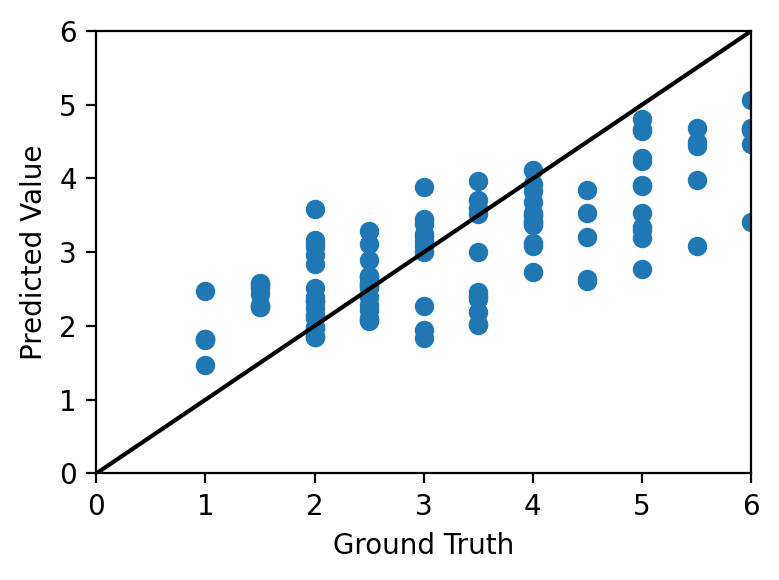

In [38]:
plot = test_df[[var]]
plot['Predicted'] = test_result
plot = plot.sort_values(by=[var], ascending = True, na_position='first').reset_index(drop = True)

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(4, 3), dpi=200)
plt.scatter(plot[var], plot['Predicted'])

x = [0,6]
y = [0,6]
plt.plot(x,y, color="black")

plt.xlim([0,6])
plt.ylim([0,6])

# plt.xlabel(var+' Ground Truth')
# plt.ylabel(var+' Predicted')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Value')
plt.tight_layout()
plt.savefig(var+'.png')
print (var, r_squared)

In [39]:
test_df[var+'_predicted'] = test_result

In [52]:
test_df[(test_df[var+'_predicted'] > 5) & (test_df[var] == 6)]

,Unnamed: 0,Participant ID,Idea#,Image_ID,Zoom,text,Creativity_expert,Useful_expert,Unique_expert,Drawing_expert,...,partition_Useful_expert,partition_Elegence_expert,partition_Creativity_expert,set3_Unique_expert,set3_Drawing_expert,set3_Useful_expert,set3_Elegence_expert,set3_Creativity_expert,set4_Elegence_expert,Unique_expert_predicted
709,709,111,5,Page-730,2,like the chocolate river in charlie in the cho...,2.0,2.0,6.0,3.0,...,train5,train4,train5,train,train,train,train,train,train,5.057926
